<a href="https://colab.research.google.com/github/lenare/mlses-wind-power-forecast/blob/main/prototyping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Exploration Brazil
For having a first look at data and experimenting with solutions.

In [2]:
# Import dependencies
import os

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option('display.max_columns', None)


Brazil data

In [41]:
brazil_dir = "../data/brazil/"

In [8]:
uebb_file = "raw/UEBB_v1.nc"

uebb_ds = xr.open_dataset(brazil_dir + uebb_file)
uebb_ds

<xarray.Dataset>
Dimensions:                 (Time: 52560, Height: 5, Turbine: 32)
Coordinates:
  * Time                    (Time) datetime64[ns] 2013-08-01 ... 2014-07-31T2...
  * Height                  (Height) float64 10.0 40.0 60.0 80.0 100.0
  * Turbine                 (Turbine) float64 1.0 2.0 3.0 4.0 ... 30.0 31.0 32.0
Data variables: (12/40)
    wind_speed              (Height, Time) float64 ...
    wind_direction          (Height, Time) float64 ...
    wind_speed_std          (Height, Time) float64 ...
    wind_direction_std      (Height, Time) float64 ...
    wind_speed_max          (Height, Time) float64 ...
    wind_speed_min          (Height, Time) float64 ...
    ...                      ...
    UST_flag                (Time) float64 ...
    HS                      (Time) float64 ...
    HS_flag                 (Time) float64 ...
    TKE                     (Time) float64 ...
    LMO                     (Time) float64 ...
    ws_w_corrected          (Time) float64 ...
Attributes:
    title:         UEBB Dataset
    long_title:    Beberibe Wind Farm (UEBB) Experimental Dataset with a full...
    comments:      Contact: yoshi@ifsc.edu.br
    institution:   Federal Univeristy of Santa Catarina, Brazil
    CreationDate:  July 2017
    CreatedBy:     Pedro Santos
    start_time:    01-Aug-2013 00:00
    end_time:      31-Jul-2014 23:50

In [51]:
uebb_ds.head()

<xarray.Dataset>
Dimensions:                 (Time: 5, Height: 5, Turbine: 5)
Coordinates:
  * Time                    (Time) datetime64[ns] 2013-08-01 ... 2013-08-01T0...
  * Height                  (Height) float64 10.0 40.0 60.0 80.0 100.0
  * Turbine                 (Turbine) float64 1.0 2.0 3.0 4.0 5.0
Data variables: (12/40)
    wind_speed              (Height, Time) float64 nan nan nan ... 12.54 13.12
    wind_direction          (Height, Time) float64 nan nan nan ... 115.9 118.8
    wind_speed_std          (Height, Time) float64 nan nan nan ... 1.191 1.281
    wind_direction_std      (Height, Time) float64 nan nan nan ... 4.395 3.226
    wind_speed_max          (Height, Time) float64 nan nan nan ... 15.85 14.93
    wind_speed_min          (Height, Time) float64 nan nan nan ... 9.43 6.682
    ...                      ...
    UST_flag                (Time) float64 nan nan nan nan nan
    HS                      (Time) float64 nan nan nan nan nan
    HS_flag                 (Time) float64 nan nan nan nan nan
    TKE                     (Time) float64 nan nan nan nan nan
    LMO                     (Time) float64 nan nan nan nan nan
    ws_w_corrected          (Time) float64 nan nan nan nan nan
Attributes:
    title:         UEBB Dataset
    long_title:    Beberibe Wind Farm (UEBB) Experimental Dataset with a full...
    comments:      Contact: yoshi@ifsc.edu.br
    institution:   Federal Univeristy of Santa Catarina, Brazil
    CreationDate:  July 2017
    CreatedBy:     Pedro Santos
    start_time:    01-Aug-2013 00:00
    end_time:      31-Jul-2014 23:50

In [34]:
# get turbine 2 as df
uebb_df_2 = uebb_ds.sel(Turbine=2).to_dataframe()
# drop column Turbine
uebb_df_2 = uebb_df_2.drop(columns=["Turbine"])

In [35]:
uebb_df_2.head(100)

wind_speed  wind_direction  wind_speed_std  \
Time                Height                                               
2013-08-01 00:00:00 10.0           NaN             NaN             NaN   
                    40.0         12.05             NaN           1.235   
                    60.0         13.02           129.7           1.119   
                    80.0         13.50           110.8           0.992   
                    100.0        13.67           113.0           1.031   
...                                ...             ...             ...   
2013-08-01 03:10:00 10.0           NaN             NaN             NaN   
                    40.0          9.64             NaN           1.496   
                    60.0          9.75           119.2           1.679   
                    80.0          9.34           116.9           2.414   
                    100.0        10.54           120.6           2.025   

                            wind_direction_std  wind_speed_max  \
Time                Height                                       
2013-08-01 00:00:00 10.0                   NaN             NaN   
                    40.0                   NaN           14.91   
                    60.0                   NaN           15.86   
                    80.0                 4.503           15.86   
                    100.0                3.066           15.85   
...                                        ...             ...   
2013-08-01 03:10:00 10.0                   NaN             NaN   
                    40.0                   NaN           13.99   
                    60.0                   NaN           14.94   
                    80.0                 7.365           14.02   
                    100.0                7.998           14.01   

                            wind_speed_min  wind_speed_cube  air_temperature  \
Time                Height                                                     
2013-08-01 00:00:00 10.0               NaN              NaN              NaN   
                    40.0             8.500          1801.50           298.80   
                    60.0             9.430          2253.90              NaN   
                    80.0            10.350          2501.00              NaN   
                    100.0           10.350          2595.80           298.47   
...                                    ...              ...              ...   
2013-08-01 03:10:00 10.0               NaN              NaN              NaN   
                    40.0             6.672           962.11           298.31   
                    60.0             4.835          1009.10              NaN   
                    80.0             2.999           974.89              NaN   
                    100.0            3.933          1295.60           298.02   

                            relative_humidity  air_pressure  \
Time                Height                                    
2013-08-01 00:00:00 10.0                  NaN        1009.2   
                    40.0                78.24        1009.2   
                    60.0                  NaN        1009.2   
                    80.0                  NaN        1009.2   
                    100.0               80.10        1009.2   
...                                       ...           ...   
2013-08-01 03:10:00 10.0                  NaN        1008.1   
                    40.0                75.56        1008.1   
                    60.0                  NaN        1008.1   
                    80.0                  NaN        1008.1   
                    100.0               77.78        1008.1   

                            logger_temperature  battery_V     ws_u    ws_v  \
Time                Height                                                   
2013-08-01 00:00:00 10.0                 26.74      12.50 -11.4120  3.7029   
                    40.0                 26.74      12.50 -11.4120  3.7029   
                    60.0         

In [36]:
# for now, only average over height index
uebb_df_2_mean = uebb_df_2.groupby(level=0).mean()

uebb_df_2_mean.head()

,wind_speed,wind_direction,wind_speed_std,wind_direction_std,wind_speed_max,wind_speed_min,wind_speed_cube,air_temperature,relative_humidity,air_pressure,logger_temperature,battery_V,ws_u,ws_v,ws_w,sonic_temperature,sonic_wind_speed,sonic_wind_direction,tilt_X,tilt_Y,tilt_X_std,tilt_Y_std,wind_speed_nacelle,wind_speed_nacelle_max,wind_speed_nacelle_min,rotor_rpm,rotor_rpm_max,rotor_rpm_min,active_power_total,active_power_total_max,active_power_total_min,act_position,air_density,UST,UST_flag,HS,HS_flag,TKE,LMO,ws_w_corrected
Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-08-01 00:00:00,13.0600,117.833333,1.09425,3.7845,15.62,9.65750,2288.050,298.635,79.170,1009.2,26.74,12.50,-11.412,3.7029,-0.3583,300.880,14.23,107.5,-5.6425,3.9383,1.4354,2.7211,12.4,16.2,8.8,30.93,32.20,28.39,793.0,825.0,582.0,132.0,1.1665,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-08-01 00:10:00,12.1975,113.466667,1.57650,4.2090,15.62,7.36325,1926.600,298.615,78.620,1009.1,26.69,12.50,-11.228,4.0687,-0.0021,300.816,13.66,109.7,-5.6139,4.0239,1.5061,2.6654,11.9,15.9,9.3,30.79,32.68,28.17,783.0,835.0,544.0,134.0,1.1666,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-08-01 00:20:00,12.2050,112.900000,1.32150,4.3325,15.16,7.82075,1903.725,298.545,79.875,1009.0,26.65,12.50,-11.000,3.4044,-0.2243,300.798,13.52,106.7,-5.6269,3.9073,1.0126,2.0478,12.5,16.3,10.5,30.97,32.04,29.06,798.0,826.0,679.0,135.0,1.1666,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-08-01 00:30:00,11.7575,114.566667,1.45950,4.8590,15.39,7.59150,1717.475,298.515,79.960,1009.1,26.61,12.49,-10.812,3.9910,0.1447,300.791,13.01,110.2,-5.6639,3.9574,1.0164,2.0993,11.6,14.9,10.3,31.02,32.59,29.73,798.0,832.0,745.0,135.0,1.1668,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-08-01 00:40:00,12.4550,117.933333,1.40875,3.4690,14.93,6.67500,2015.850,298.470,78.430,1009.0,26.57,12.49,-10.588,4.7564,-0.1570,300.690,13.78,113.1,-5.6087,4.0260,1.4690,2.8011,11.0,16.2,8.7,30.53,32.19,28.29,770.0,826.0,562.0,136.0,1.1672,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
# rename Time index to timestamp
uebb_df_2_mean.index.rename("timestamp", inplace=True)
# sort index
uebb_df_2_mean.sort_index(inplace=True)
uebb_df_2_mean.head()

,wind_speed,wind_direction,wind_speed_std,wind_direction_std,wind_speed_max,wind_speed_min,wind_speed_cube,air_temperature,relative_humidity,air_pressure,logger_temperature,battery_V,ws_u,ws_v,ws_w,sonic_temperature,sonic_wind_speed,sonic_wind_direction,tilt_X,tilt_Y,tilt_X_std,tilt_Y_std,wind_speed_nacelle,wind_speed_nacelle_max,wind_speed_nacelle_min,rotor_rpm,rotor_rpm_max,rotor_rpm_min,active_power_total,active_power_total_max,active_power_total_min,act_position,air_density,UST,UST_flag,HS,HS_flag,TKE,LMO,ws_w_corrected
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-08-01 00:00:00,13.0600,117.833333,1.09425,3.7845,15.62,9.65750,2288.050,298.635,79.170,1009.2,26.74,12.50,-11.412,3.7029,-0.3583,300.880,14.23,107.5,-5.6425,3.9383,1.4354,2.7211,12.4,16.2,8.8,30.93,32.20,28.39,793.0,825.0,582.0,132.0,1.1665,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-08-01 00:10:00,12.1975,113.466667,1.57650,4.2090,15.62,7.36325,1926.600,298.615,78.620,1009.1,26.69,12.50,-11.228,4.0687,-0.0021,300.816,13.66,109.7,-5.6139,4.0239,1.5061,2.6654,11.9,15.9,9.3,30.79,32.68,28.17,783.0,835.0,544.0,134.0,1.1666,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-08-01 00:20:00,12.2050,112.900000,1.32150,4.3325,15.16,7.82075,1903.725,298.545,79.875,1009.0,26.65,12.50,-11.000,3.4044,-0.2243,300.798,13.52,106.7,-5.6269,3.9073,1.0126,2.0478,12.5,16.3,10.5,30.97,32.04,29.06,798.0,826.0,679.0,135.0,1.1666,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-08-01 00:30:00,11.7575,114.566667,1.45950,4.8590,15.39,7.59150,1717.475,298.515,79.960,1009.1,26.61,12.49,-10.812,3.9910,0.1447,300.791,13.01,110.2,-5.6639,3.9574,1.0164,2.0993,11.6,14.9,10.3,31.02,32.59,29.73,798.0,832.0,745.0,135.0,1.1668,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-08-01 00:40:00,12.4550,117.933333,1.40875,3.4690,14.93,6.67500,2015.850,298.470,78.430,1009.0,26.57,12.49,-10.588,4.7564,-0.1570,300.690,13.78,113.1,-5.6087,4.0260,1.4690,2.8011,11.0,16.2,8.7,30.53,32.19,28.29,770.0,826.0,562.0,136.0,1.1672,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
# print percentage of missing values
uebb_df_2_mean.isna().sum()/len(uebb_df_2_mean)*100

wind_speed                 0.074201
wind_direction             0.074201
wind_speed_std             0.074201
wind_direction_std         0.074201
wind_speed_max             0.074201
wind_speed_min             0.074201
wind_speed_cube            0.074201
air_temperature            0.074201
relative_humidity          0.074201
air_pressure               0.074201
logger_temperature         0.074201
battery_V                  0.074201
ws_u                       0.074201
ws_v                       0.074201
ws_w                       0.074201
sonic_temperature          0.000000
sonic_wind_speed           0.000000
sonic_wind_direction       0.000000
tilt_X                     0.074201
tilt_Y                     0.074201
tilt_X_std                 0.074201
tilt_Y_std                 0.074201
wind_speed_nacelle         0.245434
wind_speed_nacelle_max     0.245434
wind_speed_nacelle_min     0.245434
rotor_rpm                  0.245434
rotor_rpm_max              0.245434
rotor_rpm_min              0

In [48]:
uebb_df_2_mean.to_csv(brazil_dir + "processed/uebb_df_2.csv")

In [ ]:
selected_uebb_ds = uebb_ds.isel(Time=slice(0, 6*24)) # one day
selected_uebb_ds

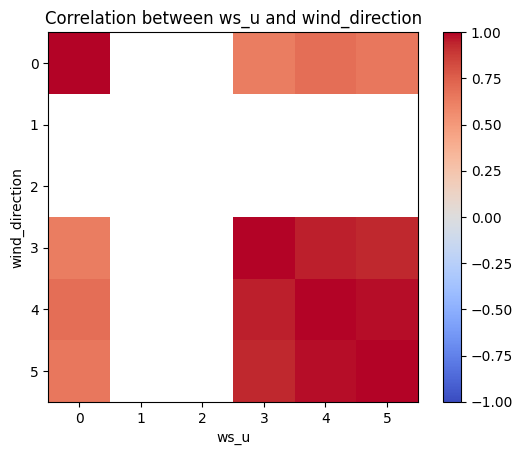

In [26]:

correlation = np.corrcoef(selected_uebb_ds['ws_u'], selected_uebb_ds['wind_direction'])
# Visualize the correlations as a heatmap
plt.imshow(correlation, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar()
plt.title('Correlation between ws_u and wind_direction')
plt.xlabel('ws_u')
plt.ylabel('wind_direction')
plt.show()

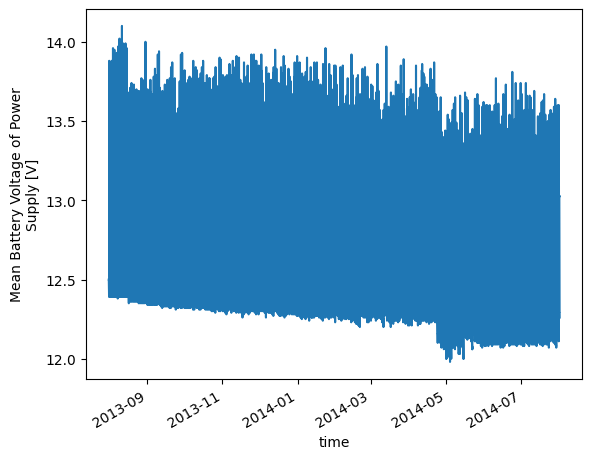

In [8]:
# plot values for uebb_ds 'battery_V' column
uebb_ds['battery_V'].plot()